In [2]:
# 安装可视化库（可选）
!pip install plotly -q

# 导入所需库
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files

# 点击按钮上传本地 CSV 文件
uploaded = files.upload()

# 获取上传的文件名（假设只上传一个文件）
filename = list(uploaded.keys())[0]

# 读取上传的 CSV 文件
df = pd.read_csv(filename)

# 显示数据大小与前几行
print("📄 数据集大小：", df.shape)
df.head()


Saving amazon_with_predictions.csv to amazon_with_predictions.csv
📄 数据集大小： (5308, 9)


,brand,text,created_at,label,rating,lang,cleaned_text,label_encoded,predicted_label
0,Apple,Excellent phone. Better than One Plus,2024-01-25,positive,5,en,excellent phone better one plus,2,2
1,Apple,Charged less than 90% and unresponsive. I boug...,2023-12-31,negative,1,en,charged less unresponsive bought beginning dec...,0,0
2,Apple,Nice colour. I got this for 46k with all disco...,2024-05-23,positive,5,en,nice colour got k discounts good deal camera q...,2,2
3,Apple,Very bad experience with i phone 13. Useless p...,2023-11-10,negative,1,en,bad experience phone useless phon never buy he...,0,0
4,Apple,"Amazing phone. It is an amazing phone, the ent...",2022-05-17,positive,5,en,amazing phone amazing phone entire experience ...,2,2


In [3]:
# 将 created_at 转换为日期格式
df['created_at'] = pd.to_datetime(df['created_at'])

# 新建一个列，提取年月（用于分组分析）
df['year_month'] = df['created_at'].dt.to_period('M').astype(str)

# 检查是否提取成功
df[['created_at', 'year_month']].head()


,created_at,year_month
0,2024-01-25,2024-01
1,2023-12-31,2023-12
2,2024-05-23,2024-05
3,2023-11-10,2023-11
4,2022-05-17,2022-05


<Figure size 1200x600 with 0 Axes>

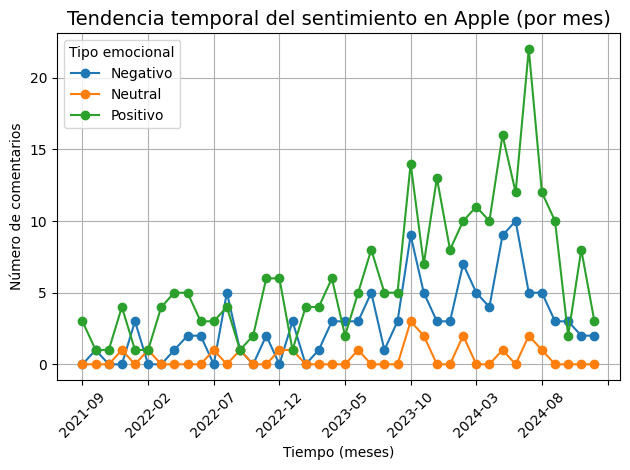

<Figure size 1200x600 with 0 Axes>

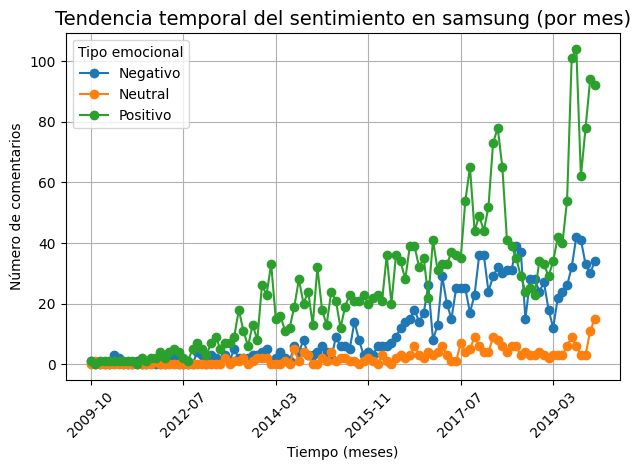

<Figure size 1200x600 with 0 Axes>

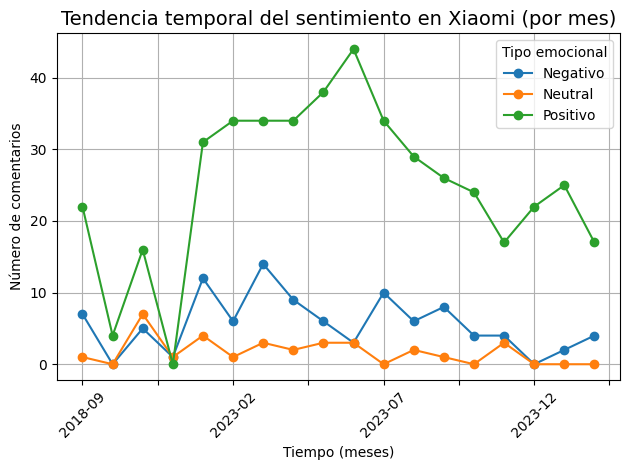

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#  Asegurarse de que la fecha sea tipo datetime y extraer el año-mes
df['created_at'] = pd.to_datetime(df['created_at'])
df['year_month'] = df['created_at'].dt.to_period('M').astype(str)

#  Diccionario para traducir etiquetas numéricas a texto
label_map = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}

#  Obtener lista de marcas
marcas = df['brand'].unique()

#  Graficar la tendencia de sentimiento para cada marca
for marca in marcas:
    df_marca = df[df['brand'] == marca]  # Filtrar por marca

    # Agrupar por mes y tipo de sentimiento
    tendencia = df_marca.groupby(['year_month', 'predicted_label']).size().unstack(fill_value=0)
    tendencia.rename(columns=label_map, inplace=True)

    # Graficar
    plt.figure(figsize=(12, 6))
    tendencia.plot(marker='o')
    plt.title(f'Tendencia temporal del sentimiento en {marca} (por mes)', fontsize=14)
    plt.xlabel('Tiempo (meses)')
    plt.ylabel('Número de comentarios')
    plt.legend(title='Tipo emocional')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [9]:
# Diccionario con eventos clave y fechas en formato 'YYYY-MM'
event_dates = {
    'Lanzamiento del iPhone 15': '2023-09',
    'Lanzamiento del iPhone 14': '2022-09',
    'Lanzamiento del Samsung Galaxy S23': '2023-02',
    'Lanzamiento del Xiaomi Redmi Note 12': '2022-10',
    'Problemas de sobrecalentamiento del iPhone 14': '2022-10',
    'Noticias sobre baterías defectuosas del Samsung S20': '2021-05'
}

# Mostrar todos los eventos definidos
for evento, fecha in event_dates.items():
    print(f"{evento}: {fecha}")


Lanzamiento del iPhone 15: 2023-09
Lanzamiento del iPhone 14: 2022-09
Lanzamiento del Samsung Galaxy S23: 2023-02
Lanzamiento del Xiaomi Redmi Note 12: 2022-10
Problemas de sobrecalentamiento del iPhone 14: 2022-10
Noticias sobre baterías defectuosas del Samsung S20: 2021-05


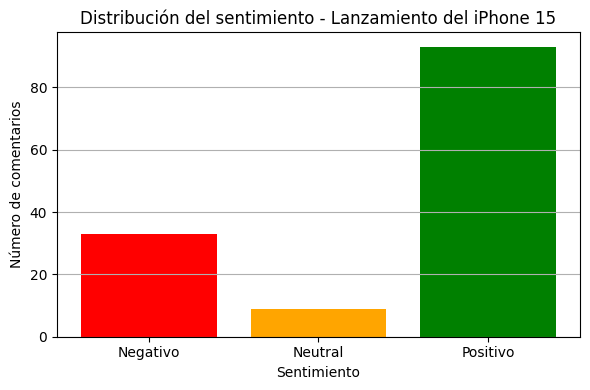

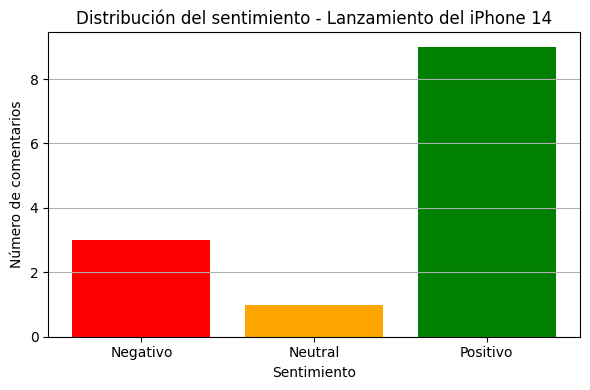

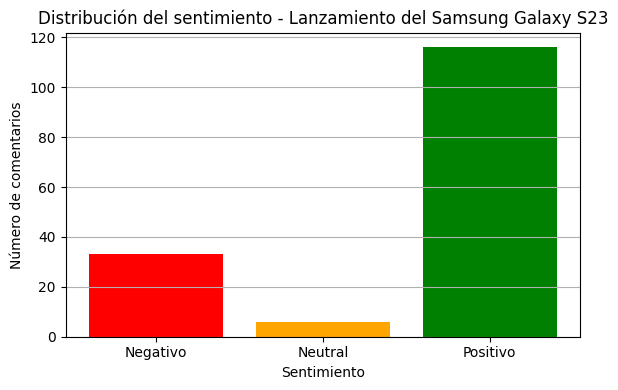

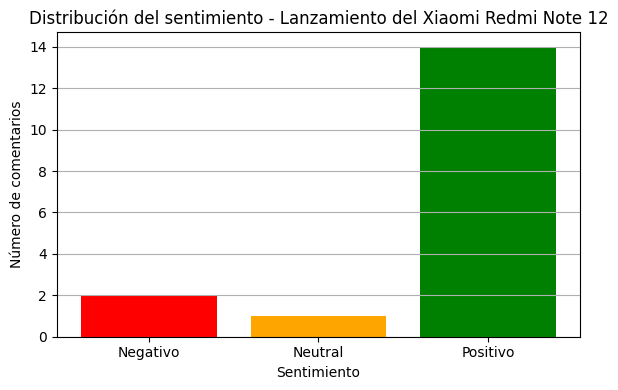

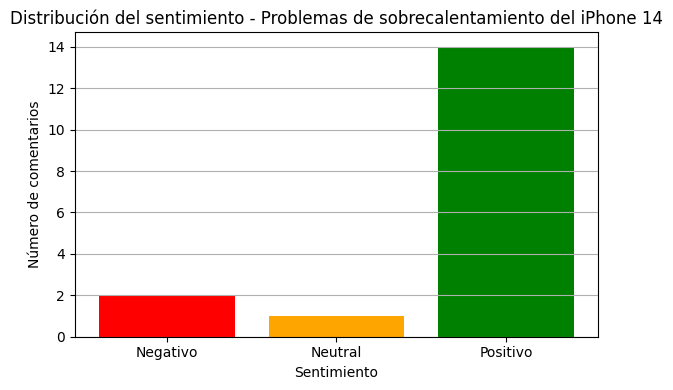

In [11]:
import matplotlib.pyplot as plt

# 西语标签映射
label_map = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}
colors = ['red', 'orange', 'green']

# 开始绘图
for evento, fecha in event_dates.items():
    # 筛选事件当月及前后一个月的评论
    meses = pd.date_range(start=f'{fecha}-01', periods=3, freq='MS').strftime('%Y-%m').tolist()
    df_evento = df[df['year_month'].isin(meses)]

    # 如果该时间段无相关评论，则跳过
    if df_evento.empty:
        continue

    # 获取情绪分布并映射标签
    conteo = df_evento['predicted_label'].value_counts().sort_index()
    etiquetas = [label_map[i] for i in conteo.index]
    valores = conteo.values

    # 绘制柱状图
    plt.figure(figsize=(6, 4))
    plt.bar(etiquetas, valores, color=[colors[i] for i in conteo.index])
    plt.title(f'Distribución del sentimiento - {evento}')
    plt.xlabel('Sentimiento')
    plt.ylabel('Número de comentarios')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [14]:
# 检查每个事件的前后6个月是否有评论
for evento, fecha in event_dates.items():
    # 计算时间窗口（前3个月 ~ 后3个月）
    meses = pd.date_range(start=pd.to_datetime(fecha) - pd.DateOffset(months=3),
                          end=pd.to_datetime(fecha) + pd.DateOffset(months=3),
                          freq='MS').strftime('%Y-%m').tolist()

    df_evento = df[df['year_month'].isin(meses)]

    print(f" {evento}: {len(df_evento)} comentarios entre {meses[0]} y {meses[-1]}")


 Lanzamiento del iPhone 15: 332 comentarios entre 2023-06 y 2023-12
 Lanzamiento del iPhone 14: 38 comentarios entre 2022-06 y 2022-12
 Lanzamiento del Samsung Galaxy S23: 274 comentarios entre 2022-11 y 2023-05
 Lanzamiento del Xiaomi Redmi Note 12: 85 comentarios entre 2022-07 y 2023-01
 Problemas de sobrecalentamiento del iPhone 14: 85 comentarios entre 2022-07 y 2023-01
 Noticias sobre baterías defectuosas del Samsung S20: 30 comentarios entre 2021-02 y 2021-08


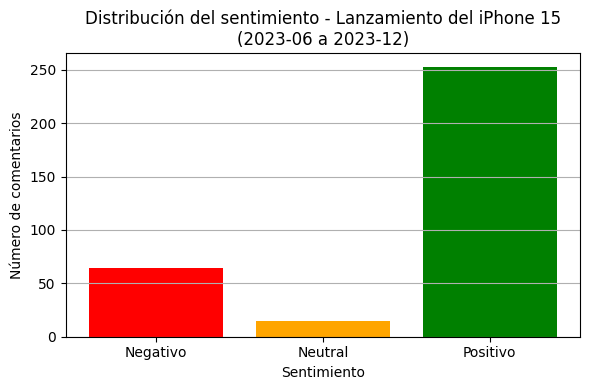

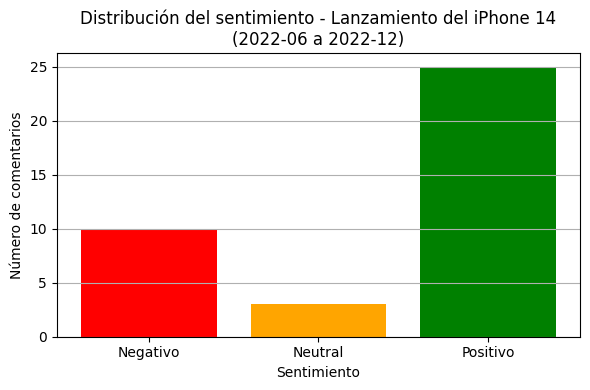

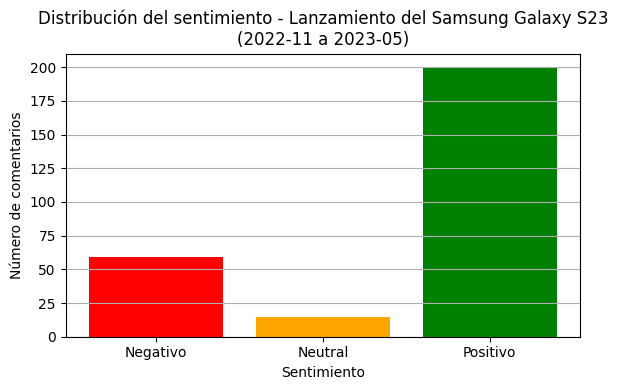

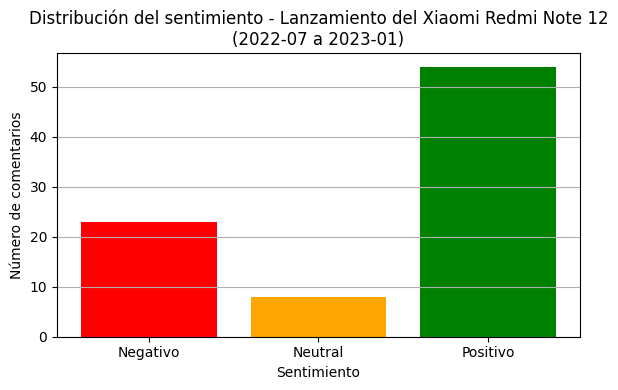

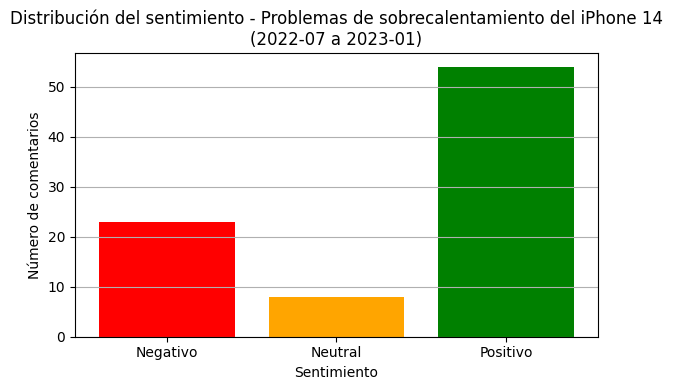

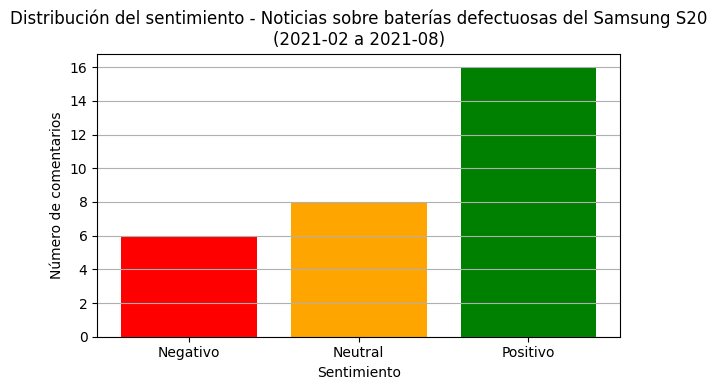

In [13]:
import matplotlib.pyplot as plt

# 标签和颜色映射（保持不变）
label_map = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}
colors = ['red', 'orange', 'green']

# 重设图表：每个事件 ±3个月（共7个月）
for evento, fecha in event_dates.items():
    # 计算月份区间
    meses = pd.date_range(start=pd.to_datetime(fecha) - pd.DateOffset(months=3),
                          end=pd.to_datetime(fecha) + pd.DateOffset(months=3),
                          freq='MS').strftime('%Y-%m').tolist()

    df_evento = df[df['year_month'].isin(meses)]

    if df_evento.empty:
        continue  # 没有评论就跳过

    conteo = df_evento['predicted_label'].value_counts().sort_index()
    etiquetas = [label_map[i] for i in conteo.index]
    valores = conteo.values

    # 绘图
    plt.figure(figsize=(6, 4))
    plt.bar(etiquetas, valores, color=[colors[i] for i in conteo.index])
    plt.title(f'Distribución del sentimiento - {evento}\n({meses[0]} a {meses[-1]})')
    plt.xlabel('Sentimiento')
    plt.ylabel('Número de comentarios')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
